In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.1 MB 1.4 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.1 MB 2.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.5/2.1 MB 2.4 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.1 MB 3.2 MB/s eta 0:00:01
   -------------------- ------------------- 1.1/2.1 MB 3.4 MB/s eta 0:00:01
   --------------------------- ------------ 1.4/2.1 MB 4.0 MB/s eta 0:00:01
   ----------------------------- ---------- 1.6/2.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 4.2 MB/s 

In [2]:
pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ----- ---------------------------------- 92.2/614.7 kB 2.6 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/614.7 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.8 MB 9.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.8 MB 7.7 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 8.6 MB/s eta 0:00:01
   ----------------------- ---------------- 1.6/2.8 MB 8.6 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.8 MB 9.1 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.8 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 8.5 MB/s eta 0:00:00
   ----------

In [28]:
df=pd.read_csv('5_yrs_data_of_wind.csv',index_col='DateTime',parse_dates=True)
print(df.shape)
df.head()

(46007, 4)


,Air temperature,Pressure,Wind speed,Power generated by system
DateTime,,,,
01-01-2019 01:00,10.926,0.979103,9.014,33.6881
01-01-2019 02:00,9.919,0.979566,9.428,37.2619
01-01-2019 03:00,8.567,0.979937,8.700,30.5029
01-01-2019 04:00,7.877,0.980053,8.481,28.4192
01-01-2019 05:00,7.259,0.979867,8.383,27.3703


<Axes: xlabel='DateTime'>

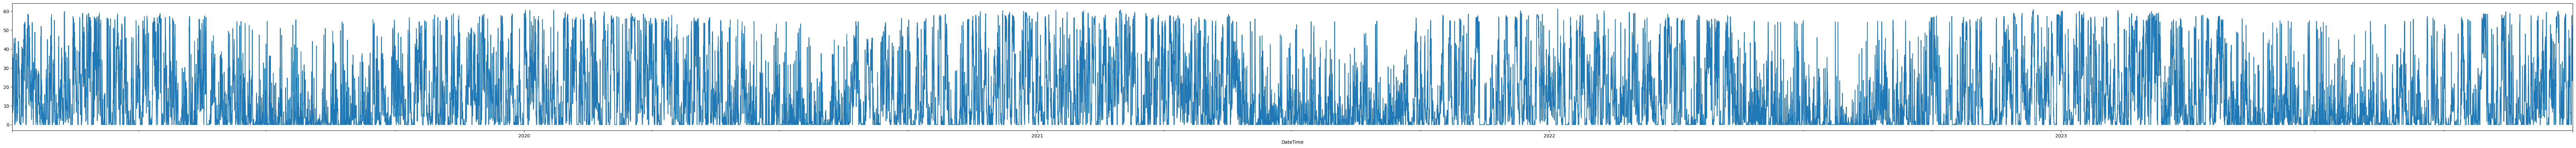

In [13]:
df['Power generated by system'].plot(figsize=(100,5))

In [14]:
from statsmodels.tsa.stattools import adfuller

In [29]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [30]:
ad_test(df['Power generated by system'])

1. ADF :  -21.55291708003426
2. P-Value :  0.0
3. Num Of Lags :  50
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 45956
5. Critical Values :
	 1% :  -3.4304923027526337
	 5% :  -2.8616028947721857
	 10% :  -2.5668034768283507


In [17]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [20]:
stepwise_fit=auto_arima(df['Power generated by system'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=177.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=290562.626, Time=1.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=290181.115, Time=1.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=290115.383, Time=13.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=290560.626, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=290009.043, Time=20.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=113.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=118.81 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=289923.576, Time=11.99 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=289847.492, Time=14.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=160.56 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=289808.078, Time=37.57 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=201.07 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=289717.539, Time=44.25 sec
 ARIMA(1,1,5)(0,0,0)[0] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                43823
Model:               SARIMAX(0, 1, 5)   Log Likelihood             -144851.770
Date:                Sat, 06 Apr 2024   AIC                         289715.539
Time:                        21:07:14   BIC                         289767.666
Sample:                    01-01-2019   HQIC                        289731.968
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0915      0.003     36.015      0.000       0.087       0.096
ma.L2         -0.0829      0.003    -24.322      0.000      -0.090      -0.076
ma.L3         -0.0574      0.004    -14.909      0.000      -0.065      -0.050
ma.L4         -0.0475      0.004    -11.627      0.000      -0.056      -0.040
ma.L5         -0.0509      0.004    -12.569      0.000      -0.059      -0.043
sigma2        43.5120      0.134    325.054      0.000      43.250      43.774
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):            157395.76
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.16
Prob(H) (two-sided):                  0.07   Kurtosis:                        12.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
train=df[:-2184]
test=df[-2184:]
print(train.shape,test.shape)

(43823, 4) (2184, 4)


In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [32]:
model=ARIMA(train['Power generated by system'],order=(0,1,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Power generated by system   No. Observations:                43823
Model:                        ARIMA(0, 1, 5)   Log Likelihood             -144851.770
Date:                       Sat, 06 Apr 2024   AIC                         289715.539
Time:                               21:40:34   BIC                         289767.666
Sample:                                    0   HQIC                        289731.968
                                     - 43823                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0915      0.003     36.015      0.000       0.087       0.096
ma.L2         -0.0829      0.003    -24.322      0.000      -0.090      -0.076
ma.L3         -0.0574      0.004    -14.909      0.000      -0.065      -0.050
ma.L4         -0.0475      0.004    -11.627      0.000      -0.056      -0.040
ma.L5         -0.0509      0.004    -12.569      0.000      -0.059      -0.043
sigma2        43.5120      0.134    325.054      0.000      43.250      43.774
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):            157395.76
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.16
Prob(H) (two-sided):                  0.07   Kurtosis:                        12.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
start=len(train)
end=start+len(test)-1
y_pred=model.predict(start=start,end=end,typ='levels')

y_pred.index=df.index[start:end+1]
print(y_pred)

DateTime
01-01-2024 00:00    36.779678
01-01-2024 01:00    36.509703
01-01-2024 02:00    36.385060
01-01-2024 03:00    36.382432
01-01-2024 04:00    36.425784
                      ...    
31-03-2024 19:00    36.425784
31-03-2024 20:00    36.425784
31-03-2024 21:00    36.425784
31-03-2024 22:00    36.425784
31-03-2024 23:00    36.425784
Name: predicted_mean, Length: 2184, dtype: float64


<Axes: xlabel='DateTime'>

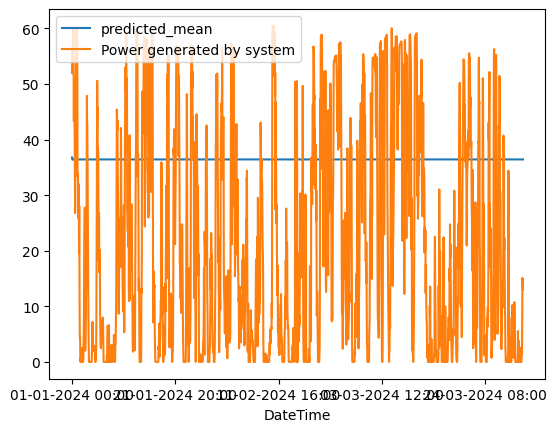

In [37]:
y_pred.plot(legend=True)
test['Power generated by system'].plot(legend=True)

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Load the data from the CSV file
data = pd.read_csv('5_yrs_grid_data2.csv')

# Convert the DateTime column to a datetime object
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract the date and energy columns
date = data['DateTime'].dt.date
energy = data['Power generated by system | (MW)']

# Convert the date column to a numerical column
date_num = pd.Categorical(date).codes

# Combine the date and energy columns
X = pd.concat([pd.Series(date_num),data[['c1','c2','c3','p1','p2','p3','n1c','n2c','n3c']]], axis=1)
X.columns = X.columns.astype(str)
# Define the target column as stability
y = data['stability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Create a logistic regression model
model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Use the model to predict stability in real-time


Accuracy: 0.7061503416856492
